In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
def plot_clusters(X2, labels, title, ax=None):
    unique_labels = np.unique(labels)
    palette = sns.color_palette('deep', n_colors=max(len(unique_labels), 3))
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))
    for i, lab in enumerate(unique_labels):
        mask = labels == lab
        if lab == -1:
            # noise in DBSCAN
            ax.scatter(X2[mask,0], X2[mask,1], c=[(0.5,0.5,0.5)], s=30, label='noise')
        else:
            ax.scatter(X2[mask,0], X2[mask,1], c=[palette[i % len(palette)]], s=40, label=f'cluster {lab}')
    ax.set_title(title)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend(loc='best', fontsize='small')
    return ax

In [3]:
# Load and prepare data
iris = load_iris()
X = iris.data
y_true = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print('X_scaled shape:', X_scaled.shape)
print('X_pca shape:', X_pca.shape)

X_scaled shape: (150, 4)
X_pca shape: (150, 2)


Adjusted Rand Index (KMeans vs true): 0.432804702527474


<Axes: title={'center': 'KMeans Clustering (PCA 2D)'}, xlabel='PC1', ylabel='PC2'>

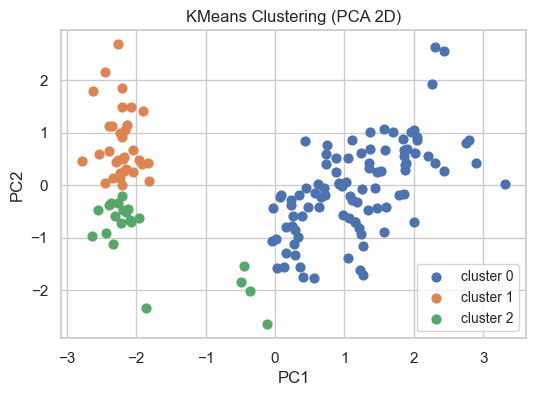

In [4]:
# 1) KMeans (baseline)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_k = kmeans.fit_predict(X_scaled)
print('Adjusted Rand Index (KMeans vs true):', adjusted_rand_score(y_true, labels_k))
plot_clusters(X_pca, labels_k, 'KMeans Clustering (PCA 2D)')

Adjusted Rand Index (Agglomerative vs true): 0.6153229932145449


<Axes: title={'center': 'Agglomerative Clustering (PCA 2D)'}, xlabel='PC1', ylabel='PC2'>

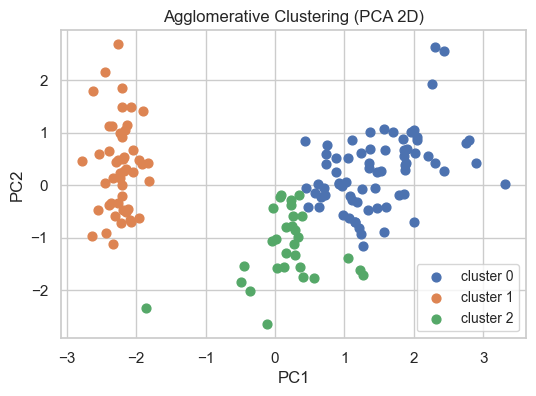

In [5]:
# 2) 层次聚类 (Agglomerative)
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X_scaled)
print('Adjusted Rand Index (Agglomerative vs true):', adjusted_rand_score(y_true, labels_agg))
plot_clusters(X_pca, labels_agg, 'Agglomerative Clustering (PCA 2D)')

Unique labels DBSCAN: [-1  0  1]
Adjusted Rand Index (DBSCAN vs true): 0.4706267335681117


<Axes: title={'center': 'DBSCAN Clustering (PCA 2D)'}, xlabel='PC1', ylabel='PC2'>

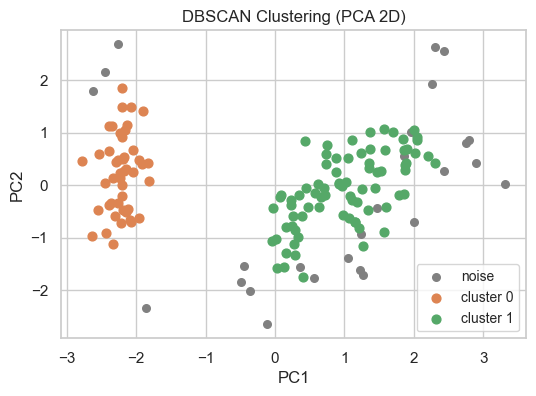

In [6]:
# 3) DBSCAN (密度聚类) — 可能产生噪声点（标签 -1）
# eps 可调整以获得更好结果；此处提供一个常见起始值 0.6
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)
print('Unique labels DBSCAN:', np.unique(labels_db))
print('Adjusted Rand Index (DBSCAN vs true):', adjusted_rand_score(y_true, labels_db))
plot_clusters(X_pca, labels_db, 'DBSCAN Clustering (PCA 2D)')